<a href="https://colab.research.google.com/github/edso2103/Cuadernos/blob/main/Parcial1_SofiaOrjuela_AlejandroSanchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png"
width="200" height="200">
</img>
<br>
<i><b>Asignatura: </b></i>Computación Paralela y Distribuida
<br>
<i><b>Estudiante: </b></i> Sofía Orjuela y Alejandro Sánchez  
<br>
<i><b>Tema: </b></i>Parcial 1 Computacion Paralela y Distribuida
<br>
<i><b>Fecha: </b></i> 10/09/22 
<br>
</FONT>
</p>

<FONT FACE="times new roman" SIZE=4> **Paso 1.** *Se importan las correspondientes bibliotecas*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<FONT FACE="times new roman" SIZE=4> **Paso 2.** *Se carga el dataset en un objeto pandas "Dataframe"*

In [ ]:
#Nodo A: Computador Alejandro
#Nodo U: Computador Universidad
#Nodo S: Computador Sofia

nodoA = pd.read_csv("https://raw.githubusercontent.com/AlejandroSanchez01/Parallel_Distributed_Computing/main/PrimerCorte/PrimerParcial/Benchmarks_Entregable/DataSet/NodoA.csv",delimiter=";")
nodoU = pd.read_csv("https://raw.githubusercontent.com/AlejandroSanchez01/Parallel_Distributed_Computing/main/PrimerCorte/PrimerParcial/Benchmarks_Entregable/DataSet/NodoU.csv",delimiter=";")
nodoS = pd.read_csv("https://raw.githubusercontent.com/AlejandroSanchez01/Parallel_Distributed_Computing/main/PrimerCorte/PrimerParcial/Benchmarks_Entregable/DataSet/NodoS.csv",delimiter=";")

<FONT FACE="times new roman" SIZE=4> **Paso 3.** *Se eliminan los valores nulos*

In [ ]:
nodoA = nodoA.dropna()
nodoU = nodoU.dropna()
nodoS = nodoS.dropna()

<FONT FACE="times new roman" SIZE=4> **Paso 4.** *Se muestran los primeros valores de cada dataset, es decir, de cada nodo*

In [ ]:
nodoA.head()

,Int_280,Int_400,Int_600,Int_750,Int_900,Int_1300,Int_1600,Int_1900,Int_2300,Int_2600,...,double_rnd_600,double_rnd_750,double_rnd_900,double_rnd_1300,double_rnd_1600,double_rnd_1900,double_rnd_2300,double_rnd_2600,double_rnd_2800,double_rnd_3000
0,0.089457,0.214364,0.756283,1.516813,2.933273,13.253941,21.877100,50.139732,91.075808,114.952837,...,0.864504,2.820105,4.003566,14.365881,26.535300,52.655534,96.168878,139.063532,159.182235,197.035159
1,0.068412,0.203520,0.764651,1.511598,2.919294,12.731837,21.807790,50.392919,91.118126,113.355628,...,0.871047,2.972137,3.953152,13.955404,27.728594,52.708404,96.563540,122.833512,157.525920,198.676360
2,0.069409,0.202639,0.727633,1.516550,2.945859,12.757858,21.789448,50.253696,91.104488,113.178384,...,0.869431,3.091191,4.096493,14.151128,26.595974,52.634645,96.451387,122.751056,157.862415,198.623100
3,0.068970,0.210196,0.719818,1.574559,2.941461,12.844263,21.844216,50.415015,91.106132,113.375557,...,0.883218,2.750714,4.356555,14.095099,26.523314,52.584855,96.675895,122.645617,158.366328,196.974471
4,0.070507,0.221908,0.947126,1.526977,2.954338,12.802047,21.675885,50.084338,91.115787,113.229229,...,0.861860,2.382843,3.943424,13.614144,26.623235,52.622228,96.312671,122.718688,157.600711,198.609081


In [ ]:
nodoU.head()

,Int_280,Int_400,Int_600,Int_750,Int_900,Int_1300,Int_1600,Int_1900,Int_2300,Int_2600,...,double_rnd_600,double_rnd_750,double_rnd_900,double_rnd_1300,double_rnd_1600,double_rnd_1900,double_rnd_2300,double_rnd_2600,double_rnd_2800,double_rnd_3000
0,0.054879,0.131746,0.458656,0.947344,1.613019,5.946104,13.880988,27.697990,61.481598,90.699212,...,0.495414,1.103049,1.766369,6.440286,20.337324,43.053794,80.177113,100.648341,125.771527,163.240826
1,0.044622,0.131845,0.457731,0.951957,1.626362,5.792503,13.580404,24.753761,61.634559,90.525371,...,0.494812,1.037065,1.753064,6.433281,20.328208,41.794506,79.047818,100.578349,125.877546,161.722552
2,0.043552,0.130826,0.458362,0.943952,1.628518,5.694576,13.900215,24.837398,61.302105,89.877324,...,0.495528,1.033822,1.759164,6.375481,20.286136,41.671779,79.195843,100.321697,127.337304,163.240826
3,0.043535,0.131344,0.459118,0.943221,1.625588,5.628374,13.621265,24.715370,60.936823,91.174704,...,0.494737,1.033321,1.753537,6.392039,20.120594,42.647041,78.274888,102.866835,127.377309,161.722552
4,0.043588,0.130563,0.458504,0.944328,1.633469,5.820211,13.856442,24.806104,61.318879,89.522310,...,0.495265,1.035504,1.762444,6.383206,20.359603,41.684788,77.925309,101.917443,126.472570,161.045088


In [ ]:
nodoS.head()

,Int_280,Int_400,Int_600,Int_750,Int_900,Int_1300,Int_1600,Int_1900,Int_2300,Int_2600,...,double_rnd_600,double_rnd_750,double_rnd_900,double_rnd_1300,double_rnd_1600,double_rnd_1900,double_rnd_2300,double_rnd_2600,double_rnd_2800,double_rnd_3000
0,0.083896,0.244597,0.873723,1.776340,3.080390,10.764604,26.818440,56.676640,103.781894,134.663363,...,0.945762,2.222907,3.711500,16.109850,31.168469,59.678236,109.896219,148.134965,186.012294,237.545874
1,0.083355,0.244330,0.873011,1.776724,3.077172,10.486710,26.589690,56.334402,103.072298,134.647674,...,0.946143,2.274291,3.805419,16.124348,31.200342,59.551771,110.169815,148.392131,185.761686,234.988926
2,0.083407,0.243907,0.871400,1.776167,3.071608,10.628705,26.682427,56.488173,103.197375,134.745513,...,0.930290,2.526334,3.648263,15.510126,31.115335,59.962573,109.644369,148.026159,184.788773,236.623357
3,0.083545,0.243536,0.874472,1.784445,3.065884,10.682150,27.075828,56.604491,103.292830,134.862027,...,0.975775,2.140871,3.616988,15.684750,31.198480,59.785446,110.023936,147.750554,186.478911,233.890138
4,0.083796,0.244500,0.873205,1.775463,3.078483,10.712663,27.059719,56.803936,103.071445,134.360363,...,0.961398,2.004370,3.595347,16.139580,31.189195,59.795766,109.668018,147.744158,186.603554,233.659121


<FONT FACE="times new roman" SIZE=4> **Paso 5.** *Se halla el promedio, redondeado a 3 digitos, de cada columna (Int_280, Int_400, Int_Rand_280, Int_Rand_400,double_280, double_400, double_rand_280, double_rand_400, etc) para cada nodo.*

In [ ]:
nodoA_Promedio = pd.DataFrame(round(nodoA.describe().loc["mean"],3))
nodoA_Promedio_ = nodoA_Promedio.copy()
nodoA_Promedio.reset_index(inplace=True, drop=True)

nodoU_Promedio = pd.DataFrame(round(nodoU.describe().loc["mean"],3))
nodoU_Promedio_ = nodoU_Promedio.copy()
nodoU_Promedio.reset_index(inplace=True, drop=True)

nodoS_Promedio = pd.DataFrame(round(nodoS.describe().loc["mean"],3))
nodoS_Promedio_ = nodoS_Promedio.copy()
nodoS_Promedio.reset_index(inplace=True, drop=True)


<FONT FACE="times new roman" SIZE=4> **Paso 6.** *Se separan los promedios de cada nodo, en cuatro variables, según el tipo de algoritmo al que corresponden(int, int_rand, double, double_rand)*

In [ ]:
nodoA_PromedioInt = nodoA_Promedio.iloc[0:12,:]
nodoA_PromedioIntRnd = nodoA_Promedio.iloc[12:24,:]
nodoA_PromedioDouble = nodoA_Promedio.iloc[24:36,:]
nodoA_PromedioDoubleRnd = nodoA_Promedio.iloc[36:48,:]

In [ ]:
nodoU_PromedioInt = nodoU_Promedio.iloc[0:12,:]
nodoU_PromedioIntRnd = nodoU_Promedio.iloc[12:24,:]
nodoU_PromedioDouble = nodoU_Promedio.iloc[24:36,:]
nodoU_PromedioDoubleRnd = nodoU_Promedio.iloc[36:48,:]

In [ ]:
nodoS_PromedioInt = nodoS_Promedio.iloc[0:12,:]
nodoS_PromedioIntRnd = nodoS_Promedio.iloc[12:24,:]
nodoS_PromedioDouble = nodoS_Promedio.iloc[24:36,:]
nodoS_PromedioDoubleRnd = nodoS_Promedio.iloc[36:48,:]

<FONT FACE="times new roman" SIZE=4> **Paso 7.** *Se crea una lista con las doce cargas para cada uno de los tres nodos. Esto para poder graficar posteriormente los datos.*

In [ ]:
cargas = [280,400,600,750,900,1300,1600,1900,2300,2600,2800,3000]
cargasTotal = list()
for i in range(0,12):
  for j in range(0,3):
    cargasTotal.append(cargas[i])
    
nodos = ["Nodo A","Nodo U","Nodo S"]*12

<FONT FACE="times new roman" SIZE=4> **Paso 8.** *Se crean listas de cada categoría (int, int_rand, double, double_rand) para unir los promedios de cada nodo.*

In [ ]:
promedioInt=list()
for i in range(0,12):
  promedioInt.append(nodoA_PromedioInt.loc[i,"mean"])
  promedioInt.append(nodoU_PromedioInt.loc[i,"mean"]) 
  promedioInt.append(nodoS_PromedioInt.loc[i,"mean"])   

promedioIntRnd=list()
for i in range(12,24):
  promedioIntRnd.append(nodoA_PromedioIntRnd.loc[i,"mean"])
  promedioIntRnd.append(nodoU_PromedioIntRnd.loc[i,"mean"])  
  promedioIntRnd.append(nodoS_PromedioIntRnd.loc[i,"mean"])  
promedioDouble=list()
for i in range(24,36):
  promedioDouble.append(nodoA_PromedioDouble.loc[i,"mean"])
  promedioDouble.append(nodoU_PromedioDouble.loc[i,"mean"])  
  promedioDouble.append(nodoS_PromedioDouble.loc[i,"mean"]) 

promedioDoubleRnd=list()
for i in range(36,48):
  promedioDoubleRnd.append(nodoA_PromedioDoubleRnd.loc[i,"mean"])
  promedioDoubleRnd.append(nodoU_PromedioDoubleRnd.loc[i,"mean"])
  promedioDoubleRnd.append(nodoS_PromedioDoubleRnd.loc[i,"mean"])    


<FONT FACE="times new roman" SIZE=4> **Paso 9.** *Se muestran las listas generadas, que se van a usar para realizar las repectivas gráficas*

In [ ]:
print(cargasTotal)
print(promedioInt)
print(promedioIntRnd)
print(promedioDouble)
print(promedioDoubleRnd)
print(nodos)

[280, 280, 280, 400, 400, 400, 600, 600, 600, 750, 750, 750, 900, 900, 900, 1300, 1300, 1300, 1600, 1600, 1600, 1900, 1900, 1900, 2300, 2300, 2300, 2600, 2600, 2600, 2800, 2800, 2800, 3000, 3000, 3000]
[0.073, 0.044, 0.083, 0.216, 0.131, 0.244, 0.754, 0.46, 0.874, 1.52, 0.961, 1.782, 2.92, 1.646, 3.084, 12.739, 5.752, 10.693, 21.866, 13.988, 26.76, 50.351, 24.952, 56.689, 91.106, 61.73, 103.229, 113.324, 90.544, 134.743, 134.311, 101.773, 161.935, 180.464, 147.72, 213.111]
[0.069, 0.044, 0.083, 0.201, 0.131, 0.245, 0.721, 0.469, 0.874, 1.533, 0.966, 1.784, 2.917, 1.664, 3.087, 12.639, 5.751, 10.589, 21.748, 14.945, 26.735, 50.411, 26.664, 56.843, 91.159, 66.644, 103.499, 113.251, 92.617, 134.966, 134.269, 105.229, 162.311, 180.577, 147.321, 212.957]
[0.075, 0.049, 0.091, 0.223, 0.147, 0.273, 0.86, 0.496, 0.924, 2.386, 1.06, 1.934, 3.926, 1.756, 3.416, 13.74, 6.213, 15.188, 26.968, 20.205, 31.164, 52.623, 42.73, 59.61, 96.496, 78.505, 110.171, 122.697, 104.384, 146.771, 157.871, 126.308

<FONT FACE="times new roman" SIZE=4> **Paso 10.** *Se  realiza una gráfica de barras, con el tiempo promedio que se obtiene del benchmark de valores enteros. Cada barra corresponde a un nodo.*

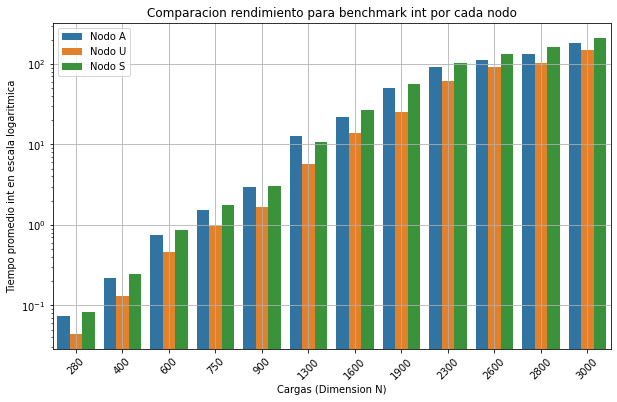

In [ ]:
plt.figure(figsize = (10,6))
s = sns.barplot(x = cargasTotal, y = promedioInt,hue=nodos)
plt.xticks(rotation=45)
plt.xlabel("Cargas (Dimension N)")
plt.ylabel("Tiempo promedio int en escala logaritmica")
plt.title("Comparacion rendimiento para benchmark int por cada nodo")
plt.grid()
plt.yscale("log") 
plt.show()

<FONT FACE="times new roman" SIZE=4> **Paso 11.** *Se  realiza una gráfica de barras, con el tiempo promedio que se obtiene del benchmark de valores enteros aleatorios. Cada barra corresponde a un nodo.*

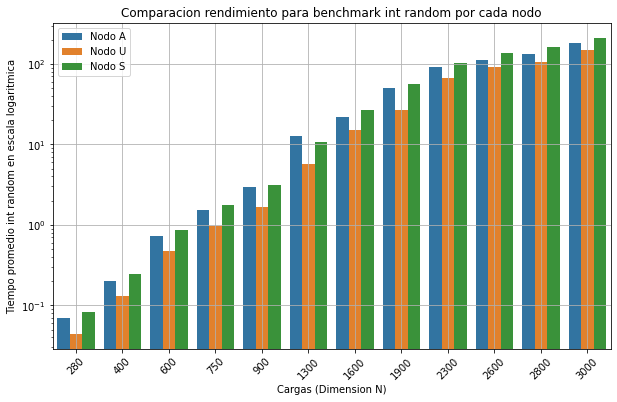

In [ ]:
plt.figure(figsize = (10,6))
s = sns.barplot(x = cargasTotal, y = promedioIntRnd,hue=nodos)
plt.xticks(rotation=45)
plt.xlabel("Cargas (Dimension N)")
plt.ylabel("Tiempo promedio int random en escala logaritmica")
plt.title("Comparacion rendimiento para benchmark int random por cada nodo")
plt.grid()
plt.yscale("log") 
plt.show()

<FONT FACE="times new roman" SIZE=4> **Paso 12.** *Se  realiza una gráfica de barras, con el tiempo promedio que se obtiene del benchmark de valores de tipo double. Cada barra corresponde a un nodo.*

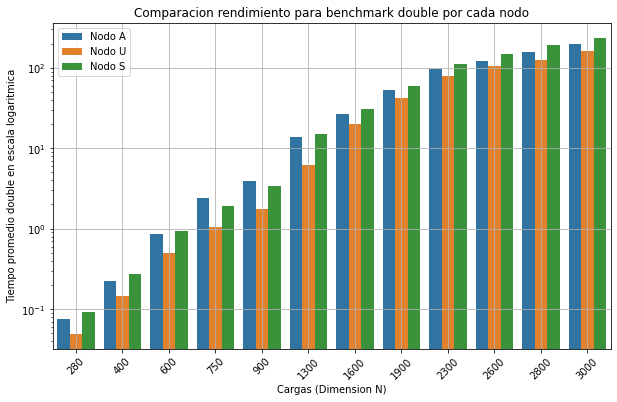

In [ ]:
plt.figure(figsize = (10,6))
s = sns.barplot(x = cargasTotal, y = promedioDouble,hue=nodos)
plt.xticks(rotation=45)
plt.xlabel("Cargas (Dimension N)")
plt.ylabel("Tiempo promedio double en escala logaritmica")
plt.title("Comparacion rendimiento para benchmark double por cada nodo")
plt.grid()
plt.yscale("log") 
plt.show()

<FONT FACE="times new roman" SIZE=4> **Paso 13.** *Se  realiza una gráfica de barras, con el tiempo promedio que se obtiene del benchmark de valores de tipo double, aleatorios. Cada barra corresponde a un nodo.*

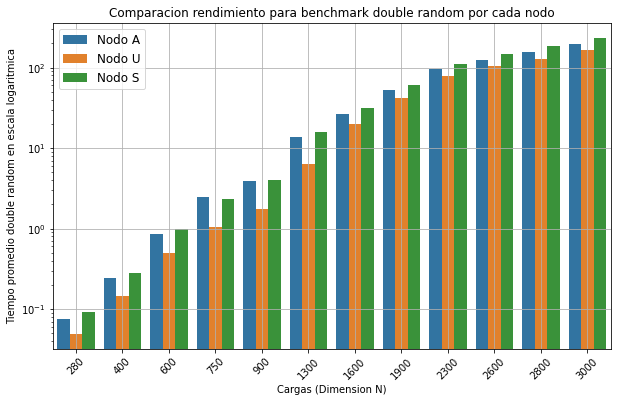

In [ ]:
plt.figure(figsize = (10,6))
s = sns.barplot(x = cargasTotal, y = promedioDoubleRnd,hue=nodos)
plt.legend(fontsize = 'large')
plt.xticks(rotation=45)
plt.xlabel("Cargas (Dimension N)")
plt.ylabel("Tiempo promedio double random en escala logaritmica")
plt.title("Comparacion rendimiento para benchmark double random por cada nodo")
plt.grid()
plt.yscale("log") 
plt.show()

<FONT FACE="times new roman" SIZE=4> **Paso 14.** *Se  realiza una gráfica del rendimiento de los diferentes nodos, al ejecutar el benchmark de números enteros para diferentes cargas*

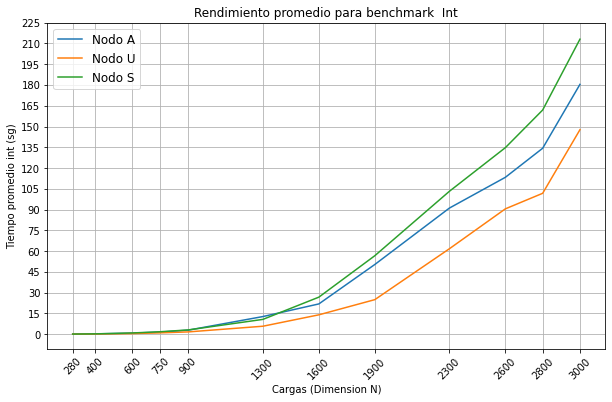

In [ ]:
plt.figure(figsize = (10,6))
s = plt.plot(cargas, nodoA_PromedioInt)
s = plt.plot(cargas, nodoU_PromedioInt)
s = plt.plot(cargas, nodoS_PromedioInt)
plt.xticks(rotation=45)
plt.legend(labels=["Nodo A","Nodo U","Nodo S"],fontsize = 'large')
plt.xlabel("Cargas (Dimension N)")
plt.ylabel("Tiempo promedio int (sg)")
plt.title("Rendimiento promedio para benchmark  Int")
plt.grid()
plt.yticks(np.arange(0, 240, step=15))
plt.xticks(cargas)
plt.show()

<FONT FACE="times new roman" SIZE=4> **Paso 15.** *Se  realiza una gráfica del rendimiento de los diferentes nodos, al ejecutar el benchmark de números enteros aleatorios, para diferentes cargas*

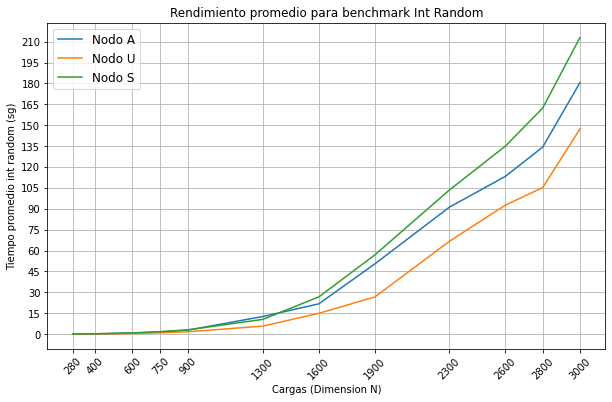

In [ ]:
plt.figure(figsize = (10,6))
s = plt.plot(cargas, nodoA_PromedioIntRnd)
s = plt.plot(cargas, nodoU_PromedioIntRnd)
s = plt.plot(cargas, nodoS_PromedioIntRnd)
plt.xticks(rotation=45)
plt.legend(labels=["Nodo A","Nodo U","Nodo S"],fontsize = 'large')
plt.xlabel("Cargas (Dimension N)")
plt.ylabel("Tiempo promedio int random (sg)")
plt.title("Rendimiento promedio para benchmark Int Random")
plt.grid()
plt.yticks(np.arange(0, 225, step=15))
#plt.xticks(np.arange(200, 3501, step=500))
plt.xticks(cargas)
plt.show()

<FONT FACE="times new roman" SIZE=4> **Paso 16.** *Se  realiza una gráfica del rendimiento de los diferentes nodos, al ejecutar el benchmark de números double, para diferentes cargas*

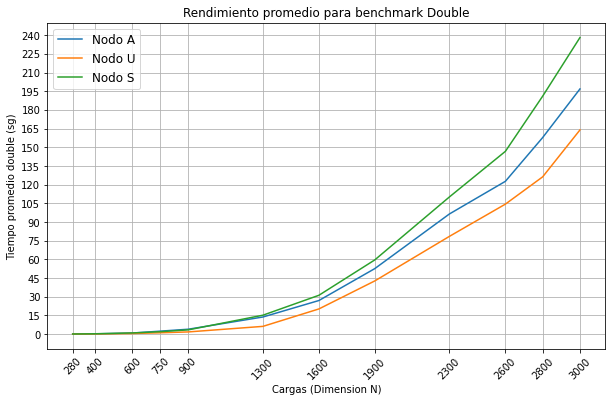

In [ ]:
plt.figure(figsize = (10,6))
s = plt.plot(cargas, nodoA_PromedioDouble)
s = plt.plot(cargas, nodoU_PromedioDouble)
s = plt.plot(cargas, nodoS_PromedioDouble)
plt.xticks(rotation=45)
plt.legend(labels=["Nodo A","Nodo U","Nodo S"],fontsize = 'large')
plt.xlabel("Cargas (Dimension N)")
plt.ylabel("Tiempo promedio double (sg)")
plt.title("Rendimiento promedio para benchmark Double")
plt.grid()
plt.yticks(np.arange(0, 241, step=15))
plt.xticks(cargas)
plt.show()

<FONT FACE="times new roman" SIZE=4> **Paso 17.** *Se  realiza una gráfica del rendimiento de los diferentes nodos, al ejecutar el benchmark de números aleatorios de tipo double,  para diferentes cargas*

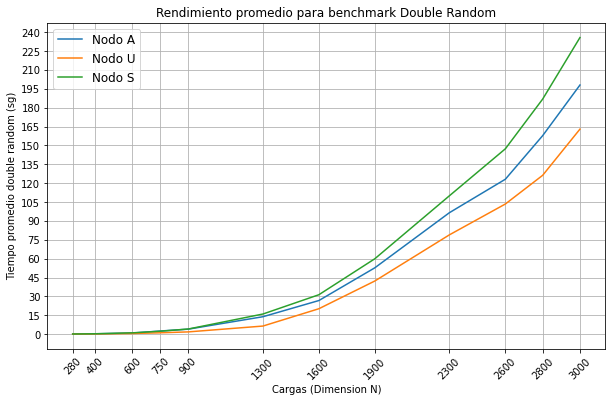

In [ ]:
plt.figure(figsize = (10,6))
s = plt.plot(cargas, nodoA_PromedioDoubleRnd)
s = plt.plot(cargas, nodoU_PromedioDoubleRnd)
s = plt.plot(cargas, nodoS_PromedioDoubleRnd)
plt.xticks(rotation=45)
plt.legend(labels=["Nodo A","Nodo U","Nodo S"],fontsize = 'large')
plt.xlabel("Cargas (Dimension N)")
plt.ylabel("Tiempo promedio double random (sg)")
plt.title("Rendimiento promedio para benchmark Double Random")
plt.grid()
plt.yticks(np.arange(0, 241, step=15))
plt.xticks(cargas)
plt.tick_params(axis='x', colors='black')
plt.show()


<FONT FACE="times new roman" SIZE=4> **Paso 18.** *Se  realiza una gráfica del rendimiento del nodo A, al ejecutar los diferentes benchmarks (int, int random, double y double random) para diferentes cargas*

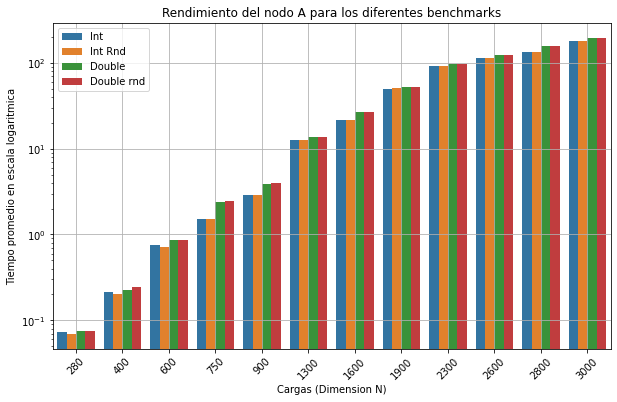

In [ ]:
cargas = [280,400,600,750,900,1300,1600,1900,2300,2600,2800,3000]
#Se necesitan 4 valores de la misma carga para cada benchmark y colocar sus tiempos
cargasTotal = list()
for i in range(0,12):
  for j in range(0,4):
    cargasTotal.append(cargas[i])

#En el eje y ira el tiempo promedio int, int random, double y double random del nodo A    
tiempos = list()
for i in range(0,12):
  tiempos.append(nodoA_PromedioInt.loc[i,"mean"])
  tiempos.append(nodoA_PromedioIntRnd.loc[12+i,"mean"])
  tiempos.append(nodoA_PromedioDouble.loc[24+i,"mean"])
  tiempos.append(nodoA_PromedioDoubleRnd.loc[36+i,"mean"])

benchmarks =["Int","Int Rnd","Double","Double rnd"]*12
plt.figure(figsize = (10,6))
s = sns.barplot(x = cargasTotal, y = tiempos, hue=benchmarks)
plt.xticks(rotation=45)
plt.xlabel("Cargas (Dimension N)")
plt.ylabel("Tiempo promedio en escala logaritmica")
plt.title("Rendimiento del nodo A para los diferentes benchmarks")
plt.grid()
plt.yscale("log") 
plt.show()

<FONT FACE="times new roman" SIZE=4> **Paso 19.** *Se presenta una muestra de los tiempos promedio para cada uno de los benchmarks del nodo A, en escala logaritmica*

In [ ]:
nodoA_promedio_loc = pd.DataFrame(np.log10(nodoA_Promedio_.loc[:,"mean"]))
nodoA_promedio_loc.sample(5)

,mean
double_rnd_900,0.596597
double_2300,1.984509
Int_1300,1.105135
Int_rnd_2300,1.959800
double_rnd_600,-0.062482


<FONT FACE="times new roman" SIZE=4> **Paso 20.** *Se presenta una muestra de  los tiempos promedio para cada uno de los benchmarks del nodo A, en su escala original (sg)*

In [ ]:
nodoA_Promedio_.sample(5)

,mean
Int_rnd_2800,134.269
Int_900,2.920
double_rnd_2800,157.778
double_1900,52.623
Int_1300,12.739


<FONT FACE="times new roman" SIZE=4> **Paso 21.** *Se  realiza una gráfica del rendimiento del nodo U, al ejecutar los diferentes benchmarks (int, int random, double y double random) para diferentes cargas*

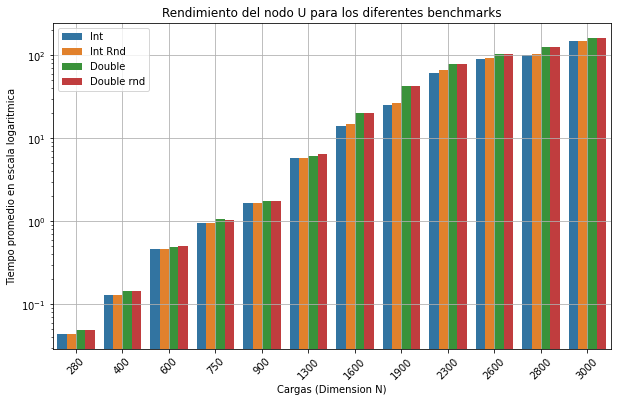

In [ ]:
cargas = [280,400,600,750,900,1300,1600,1900,2300,2600,2800,3000]
#Se necesitan 4 valores de la misma carga para cada benchmark y colocar sus tiempos
cargasTotal = list()
for i in range(0,12):
  for j in range(0,4):
    cargasTotal.append(cargas[i])

#En el eje y ira el tiempo promedio int, int random, double y double random del nodo U    
tiempos = list()
for i in range(0,12):
  tiempos.append(nodoU_PromedioInt.loc[i,"mean"])
  tiempos.append(nodoU_PromedioIntRnd.loc[12+i,"mean"])
  tiempos.append(nodoU_PromedioDouble.loc[24+i,"mean"])
  tiempos.append(nodoU_PromedioDoubleRnd.loc[36+i,"mean"])

benchmarks =["Int","Int Rnd","Double","Double rnd"]*12
plt.figure(figsize = (10,6))
s = sns.barplot(x = cargasTotal, y = tiempos, hue=benchmarks)
plt.xticks(rotation=45)
plt.xlabel("Cargas (Dimension N)")
plt.ylabel("Tiempo promedio en escala logaritmica")
plt.title("Rendimiento del nodo U para los diferentes benchmarks")
plt.grid()
plt.yscale("log") 
plt.show()

<FONT FACE="times new roman" SIZE=4> **Paso 22.** *Se presenta una muestra de los tiempos promedio para cada uno de los benchmarks del nodo U, en escala logaritmica*

In [ ]:
nodoU_promedio_loc = pd.DataFrame(np.log10(nodoU_Promedio_.loc[:,"mean"]))
nodoU_promedio_loc.sample(5)

,mean
double_2800,2.101431
double_rnd_280,-1.309804
double_rnd_750,0.018700
Int_rnd_2600,1.966691
Int_rnd_1300,0.759743


<FONT FACE="times new roman" SIZE=4> **Paso 23.** *Se presenta una muestra de  los tiempos promedio para cada uno de los benchmarks del nodo U, en su escala original (sg)*

In [ ]:
nodoU_Promedio_.sample(5)

,mean
Int_900,1.646
double_2600,104.384
double_750,1.060
Int_2300,61.730
double_rnd_3000,162.975


<FONT FACE="times new roman" SIZE=4> **Paso 24.** *Se  realiza una gráfica del rendimiento del nodo S, al ejecutar los diferentes benchmarks (int, int random, double y double random) para diferentes cargas*

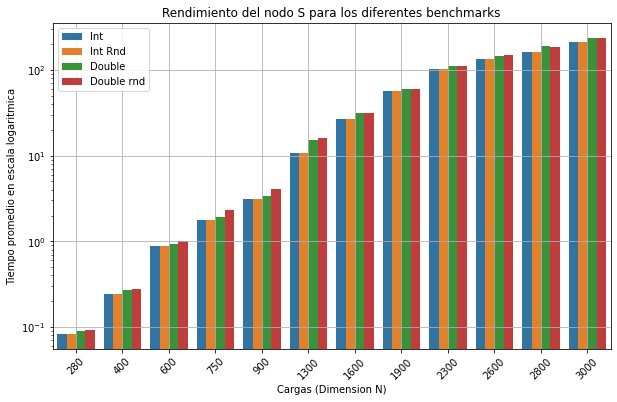

In [ ]:
cargas = [280,400,600,750,900,1300,1600,1900,2300,2600,2800,3000]
#Se necesitan 4 valores de la misma carga para cada benchmark y colocar sus tiempos
cargasTotal = list()
for i in range(0,12):
  for j in range(0,4):
    cargasTotal.append(cargas[i])

#En el eje y ira el tiempo promedio int, int random, double y double random del nodo S    
tiempos = list()
for i in range(0,12):
  tiempos.append(nodoS_PromedioInt.loc[i,"mean"])
  tiempos.append(nodoS_PromedioIntRnd.loc[12+i,"mean"])
  tiempos.append(nodoS_PromedioDouble.loc[24+i,"mean"])
  tiempos.append(nodoS_PromedioDoubleRnd.loc[36+i,"mean"])

benchmarks =["Int","Int Rnd","Double","Double rnd"]*12
plt.figure(figsize = (10,6))
s = sns.barplot(x = cargasTotal, y = tiempos, hue=benchmarks)
plt.xticks(rotation=45)
plt.xlabel("Cargas (Dimension N)")
plt.ylabel("Tiempo promedio en escala logaritmica")
plt.title("Rendimiento del nodo S para los diferentes benchmarks")
plt.grid()
plt.yscale("log") 
plt.show()

<FONT FACE="times new roman" SIZE=4> **Paso 25.** *Se presenta una muestra de  los tiempos promedio para cada uno de los benchmarks del nodo S, en escala logaritmica*

In [ ]:
nodoS_promedio_loc = pd.DataFrame(np.log10(nodoS_Promedio_.loc[:,"mean"]))
nodoS_promedio_loc.sample(5)

,mean
Int_1900,1.753499
double_rnd_1600,1.495517
Int_600,-0.058489
Int_400,-0.612610
Int_rnd_2600,2.130224


<FONT FACE="times new roman" SIZE=4> **Paso 26.** *Se presenta una muestra de los tiempos promedio para cada uno de los benchmarks del nodo S, en su escala original (sg)*

In [ ]:
nodoS_Promedio_.sample(5)

,mean
double_1600,31.164
Int_2600,134.743
double_rnd_1300,15.969
Int_2800,161.935
Int_750,1.782
